In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import glob
import matplotlib.pyplot as plt

In [3]:
def unify_csv(path, name):
    all_files = glob.glob(path + "*.csv")
    if name not in["exodos", "junker2"]: # the exodos folder seem to contain weird symbols for some column names, thus latin-1 encoding is needed
        dfs = [pd.read_csv(file, sep=';') for file in all_files]
    else:
        dfs = [pd.read_csv(file, sep=';', encoding='latin-1') for file in all_files]
    combined_df = pd.concat(dfs, join = 'outer', ignore_index=True)
    # Combine 'Datum' and 'Absolutezeit' into a single datetime column
    combined_df['Timestamp'] = pd.to_datetime(combined_df['Datum'] + ' ' + combined_df['Absolutzeit'],  dayfirst=True)
    # Sort the concatenated DataFrame by the new 'Timestamp' column
    sorted_df = combined_df.sort_values(by='Timestamp')
    # Save the result to a new CSV if needed
    sorted_df.to_csv(name + ".csv", sep = ';', index=True)

In [ ]:
# # Date range
# df = pd.read_csv("autopress.csv", sep = ';')
# print("Dates ranging from " + df['Timestamp'][0] + " to " + df['Timestamp'][-1:].iloc[0])

# Unify Antlies Pressas folder (inclusive join. High disparity in column lengths among the csv's)

In [5]:
folder_path = "./Data/Auto Press/"
unify_csv(folder_path, "antliespressas")

In [6]:
# Date range
df = pd.read_csv("antliespressas.csv", sep = ';')
print("Dates ranging from " + df['Timestamp'][0] + " to " + df['Timestamp'][-1:].iloc[0])

/tmp/ipykernel_31479/2732500298.py:2: DtypeWarning: Columns (6,82,91) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("antliespressas.csv", sep = ';')


Dates ranging from 2023-12-07 08:41:41 to 2024-11-11 10:53:00


In [8]:
len(df.columns)

94

# Unify Exodos folder (inclusive join. High disparity in column lengths among the csv's)

In [6]:
folder_path = "./Data/New_HalcoR_Data(2024)/OneDrive_1_12-5-2024/Exodos/"
unify_csv(folder_path, "exodos")

/tmp/ipykernel_28329/1730688540.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat(dfs, join = 'outer', ignore_index=True)


In [7]:
# Date range
df = pd.read_csv("exodos.csv", sep = ';')
print("Dates ranging from " + df['Timestamp'][0] + " to " + df['Timestamp'][-1:].iloc[0])

Dates ranging from 2024-06-06 08:31:51 to 2024-10-25 16:02:42


# Unify InterlockAntliostasiou folder (inclusive join. High disparity in column lengths among the csv's)

In [8]:
folder_path = "./Data/New_HalcoR_Data(2024)/OneDrive_1_12-5-2024/InterlockAntliostaiou/"
unify_csv(folder_path, "interlockantliostaiou")

/tmp/ipykernel_28329/1730688540.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat(dfs, join = 'outer', ignore_index=True)


In [9]:
# Date range
df = pd.read_csv("interlockantliostaiou.csv", sep = ';')
print("Dates ranging from " + df['Timestamp'][0] + " to " + df['Timestamp'][-1:].iloc[0])

Dates ranging from 2023-12-06 15:43:26 to 2024-06-03 07:20:11


# Unify Junker1 folder (inclusive join. High disparity in column lengths among the csv's)

In [10]:
folder_path = "./Data/New_HalcoR_Data(2024)/OneDrive_1_12-5-2024/Junker1/"
unify_csv(folder_path, "junker1")

In [11]:
# Date range
df = pd.read_csv("junker1.csv", sep = ';')
print("Dates ranging from " + df['Timestamp'][0] + " to " + df['Timestamp'][-1:].iloc[0])

/tmp/ipykernel_28329/1628634808.py:2: DtypeWarning: Columns (103,104,105) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("junker1.csv", sep = ';')


Dates ranging from 2024-06-24 16:24:22 to 2024-10-24 11:09:14


# Unify Junker2 folder (inclusive join. High disparity in column lengths among the csv's)

In [13]:
folder_path = "./Data/New_HalcoR_Data(2024)/OneDrive_1_12-5-2024/Junker2/"
unify_csv(folder_path, "junker2")

In [14]:
# Date range
df = pd.read_csv("junker2.csv", sep = ';')
print("Dates ranging from " + df['Timestamp'][0] + " to " + df['Timestamp'][-1:].iloc[0])

/tmp/ipykernel_28329/3174954517.py:2: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("junker2.csv", sep = ';')


Dates ranging from 2024-06-28 07:55:20 to 2024-10-25 12:12:12


# Testing the Energy data

In [3]:
# Concatenate all energies together for each timestamp
total_energy = None
# Folder with energy consumption files
path_to_energy_consumption_files = './Data/PRESS PME DATA FY2024.xlsx'
excel_data = pd.ExcelFile(path_to_energy_consumption_files)
start_timestamp = pd.Timestamp('2024-01-01 11:30:00')
df_energy = []
# Loop through each sheet
for sheet_name in excel_data.sheet_names:
    # Read the sheet
    df = excel_data.parse(sheet_name)
    # Keep only the first two columns
    df = df.iloc[:, :2]
    # Make all the sheets start from a specific timestamp for smoothness. Convert the timestamp column to datetime (assume it's the first column)
    df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0])
    df = df[df.iloc[:, 0] >= start_timestamp]
    df['Real Energy'] = pd.to_numeric(df['Real Energy'], downcast='float', errors='coerce')
    # Adjust timestamps where seconds are not 00
    df['Timestamp'] = df['Timestamp'].apply(lambda x: x.replace(second=0))
    df = df.sort_values(by='Timestamp', ascending= True)
    # Remove duplicates that exist in the dataset, if they exist.
    df.drop_duplicates(subset='Timestamp', keep='last', inplace = True)
    # the '-' rows should be filled with the previous value instead (the previous 15-minute)
    df = df.applymap(lambda x : np.nan if x == '-' else x) # convert - into nan so later can be filled with 'fillna' later
    df.set_index('Timestamp', inplace=True)
    df = df.resample('15min', closed='right', label='right').ffill()
    df.reset_index(inplace=True)
    df['Real Energy'] = df['Real Energy'].interpolate() # interpolate values
    # Append the DataFrame to the list
    df_energy.append(df)


total_energy = pd.concat(df_energy, ignore_index=True)
total_energy = total_energy.groupby('Timestamp').sum().reset_index()
total_energy.set_index('Timestamp', inplace=True)
# Set the initial granularity to 15 minute intervals for baseline.
total_energy = total_energy.resample('15min', closed='right', label='right').ffill()
# total_energy.replace(0, np.nan, inplace=True)
# total_energy = total_energy.interpolate()
total_energy.reset_index(inplace=True)

# Since energy was cumulative, We take the difference and save it into a column
total_energy['diff'] = total_energy['Real Energy'].diff()
total_energy['diff'] = total_energy['diff'].interpolate()
total_energy['Timestamp'] = pd.to_datetime(total_energy['Timestamp'])
total_energy = total_energy.iloc[:-1]
total_energy.drop(columns='Real Energy', inplace = True)

/tmp/ipykernel_72395/1210235635.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x : np.nan if x == '-' else x) # convert - into nan so later can be filled with 'fillna' later
/tmp/ipykernel_72395/1210235635.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x : np.nan if x == '-' else x) # convert - into nan so later can be filled with 'fillna' later
/tmp/ipykernel_72395/1210235635.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x : np.nan if x == '-' else x) # convert - into nan so later can be filled with 'fillna' later
/tmp/ipykernel_72395/1210235635.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x : np.nan if x == '-' else x) # convert - into nan so later can be filled with 'fillna' later
/tmp/ipykernel_72395/1210235635.

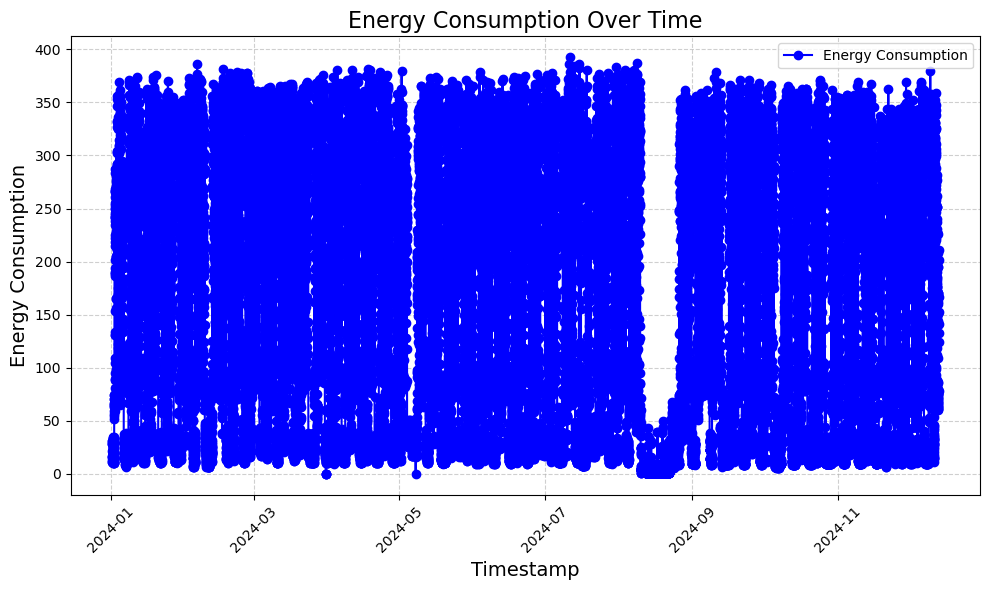

In [4]:
# Plot energy consumption over time
plt.figure(figsize=(10, 6))
plt.plot(total_energy['Timestamp'], total_energy['diff'], marker='o', linestyle='-', color='b', label='Energy Consumption')

# Set title and labels
plt.title('Energy Consumption Over Time', fontsize=16)
plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('Energy Consumption', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Display the grid
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

In [4]:
total_energy

,Timestamp,diff
0,2024-01-01 11:30:00,NaN
1,2024-01-01 11:45:00,27.768
2,2024-01-01 12:00:00,11.021
3,2024-01-01 12:15:00,16.329
4,2024-01-01 12:30:00,31.274
...,...,...
33306,2024-12-13 10:00:00,166.492
33307,2024-12-13 10:15:00,133.113
33308,2024-12-13 10:30:00,141.263
33309,2024-12-13 10:45:00,210.887


In [6]:
# total_energy['Timestamp'] = total_energy['Timestamp'].dt.strftime('%d/%m/%Y %H:%M:%S')
total_energy['Timestamp'] = pd.to_datetime(total_energy['Timestamp'])
# total_energy.to_excel("temp.xlsx", engine='openpyxl', index=False)

# Unify Auto Press folder (inclusive join. High disparity in column lengths among the csv's)

In [5]:
folder_path = "./Data/New_HalcoR_Data(2024)/OneDrive_1_12-5-2024/Auto Press/"
unify_csv(folder_path, "autopress")

In [6]:
df = pd.read_csv("autopress.csv", sep = ';')
# ------maybe drop these inside the function from earlier
df.drop(columns= ['Unnamed: 0', 'Relativzeit', 'Datum', 'Absolutzeit'], inplace= True)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
timeWindows = total_energy['Timestamp'].tolist()
labels = timeWindows[1:]
df['Time Bin'] = pd.cut(df['Timestamp'], timeWindows, labels=labels, right=False)
start_timestamp = '2024-01-01 11:30:00'
df = df[df['Timestamp'] >= start_timestamp]
for column in df.columns:
    missing_percentage = df[column].isnull().mean() * 100
    is_unique = df[column].nunique(dropna=False) == 1
    binary_unique = df[column].nunique() == 2
    # drop columns with higher than 20% missing rate || drop columns that have a constant unique value, thus not offering any info || Drop binary columns for now
    if missing_percentage > 20 or is_unique or binary_unique:
        df.drop(columns= column, inplace=True)
        
df.drop(columns='Timestamp', inplace=True)
df['Time Bin'] = pd.to_datetime(df['Time Bin'])
df = df.groupby('Time Bin', sort=True).mean().reset_index()
df

/tmp/ipykernel_72395/3075638627.py:1: DtypeWarning: Columns (6,76,88) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("autopress.csv", sep = ';')


,Time Bin,DB 10DBW 196 hp pressure pump,DB 10DBW 84 HP PRESSURE accu,DB 610DBW 12 relif valve,DB 30DBW 20 ramposition,DB 10DBW 6 ram press rign side,DB 10DBW 2 main pressure,DB 10DBW 4 ram pressure piston side,DB 30DBW 42 mand in ram,DB 30DBW 40 mand position,...,DB 13DBW 4 set torque,DB 1260DBD 100 TOOL SLIDE POSITION,DB 30DBW 140 DISCHARGER POSITION,DB 1300DBW 0 step ram,DB 1300DBW 2 step mand,DB 1300DBW 4 step cont,DB 301DBW 98 billet counter,DB 10DBW 90 metritis azotoy,MW 970,MW 972
0,2024-02-15 14:00:00,298.923077,293.358974,171.794872,1547.589744,5.948718,16.205128,18.051282,35.153846,1582.743590,...,9203.384615,1464.970769,60.769231,201.076923,4.153846,196.153846,17.307692,31.666667,NaN,NaN
1,2024-02-15 14:15:00,299.000000,293.388889,190.000000,1283.900000,6.788889,21.100000,22.133333,47.111111,1331.011111,...,9108.400000,1137.635667,52.800000,162.488889,5.400000,155.144444,19.277778,38.411111,NaN,NaN
2,2024-02-15 14:30:00,298.688889,293.633333,193.888889,1382.166667,7.255556,14.944444,16.977778,52.377778,1434.544444,...,9167.822222,1238.864889,36.566667,178.466667,7.322222,169.477778,22.233333,39.655556,NaN,NaN
3,2024-02-15 14:45:00,299.022222,293.822222,210.000000,1336.077778,6.622222,18.488889,20.122222,53.622222,1389.700000,...,9193.977778,1180.992889,35.544444,164.588889,12.955556,160.333333,25.188889,39.033333,NaN,NaN
4,2024-02-15 15:00:00,299.066667,294.011111,118.888889,1212.933333,1.111111,0.000000,0.122222,-1.055556,1211.877778,...,9520.000000,213.432000,1.000000,29.455556,0.000000,31.411111,4.800000,13.411111,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17809,2024-11-11 10:00:00,26.777778,35.322222,100.000000,757.000000,0.766667,0.000000,0.000000,407.000000,1164.000000,...,9520.000000,1905.332667,1.000000,0.000000,0.000000,0.000000,0.000000,17.000000,18.0,15.0
17810,2024-11-11 10:15:00,0.188889,0.000000,100.000000,757.000000,0.000000,0.000000,0.000000,407.000000,1164.000000,...,9520.000000,1905.310000,1.000000,0.000000,0.000000,2.277778,0.000000,17.000000,18.0,15.0
17811,2024-11-11 10:30:00,0.133333,0.000000,100.000000,757.000000,0.000000,0.000000,0.000000,407.000000,1164.000000,...,9341.733333,1905.288667,1.000000,0.000000,1.411111,0.000000,0.000000,17.000000,18.0,15.0
17812,2024-11-11 10:45:00,182.766667,179.588889,100.000000,757.000000,0.000000,0.000000,0.000000,407.000000,1164.000000,...,9520.000000,979.767111,1.000000,0.000000,0.000000,0.000000,0.000000,17.000000,18.0,15.0


In [12]:
total_energy.set_index('Timestamp', inplace=True)
df.set_index('Time Bin', inplace=True)
final_df = total_energy.join(df, how = 'left', lsuffix='out_', rsuffix='in_')

DatetimeIndex(['2024-02-15 14:00:00', '2024-02-15 14:15:00',
               '2024-02-15 14:30:00', '2024-02-15 14:45:00',
               '2024-02-15 15:00:00', '2024-02-15 15:15:00',
               '2024-02-15 15:30:00', '2024-02-15 15:45:00',
               '2024-02-15 16:00:00', '2024-02-15 16:15:00',
               ...
               '2024-11-11 08:45:00', '2024-11-11 09:00:00',
               '2024-11-11 09:15:00', '2024-11-11 09:30:00',
               '2024-11-11 09:45:00', '2024-11-11 10:00:00',
               '2024-11-11 10:15:00', '2024-11-11 10:30:00',
               '2024-11-11 10:45:00', '2024-11-11 11:00:00'],
              dtype='datetime64[ns]', name='Time Bin', length=17814, freq=None)

In [25]:
import sys
from dataset import Dataset

data = Dataset('1w')
data = data.preprocess()

/home/stelios-pc/Desktop/PhD/HALCOR/dataset.py:138: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x : np.nan if x == '-' else x) # convert - into nan so later can be filled with 'fillna' later
/home/stelios-pc/Desktop/PhD/HALCOR/dataset.py:138: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x : np.nan if x == '-' else x) # convert - into nan so later can be filled with 'fillna' later
/home/stelios-pc/Desktop/PhD/HALCOR/dataset.py:138: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x : np.nan if x == '-' else x) # convert - into nan so later can be filled with 'fillna' later
/home/stelios-pc/Desktop/PhD/HALCOR/dataset.py:138: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x : np.nan if x == '-' else x) # convert - into nan so later can be filled 

In [26]:
for column in data.columns:
    missing_percentage = data[column].isnull().mean() * 100
    print(f"Percentage of missing values in column '{column}': {missing_percentage:.2f}%")

Percentage of missing values in column 'Timestamp': 0.00%
Percentage of missing values in column 'diff': 0.00%
Percentage of missing values in column 'DB   10DBW  196  hp pressure pump': 22.00%
Percentage of missing values in column 'DB   10DBW   84   HP PRESSURE  accu': 22.00%
Percentage of missing values in column 'DB  610DBW   12  relif valve': 22.00%
Percentage of missing values in column 'DB   30DBW   20  ramposition': 22.00%
Percentage of missing values in column 'DB   10DBW    6  ram press rign side': 22.00%
Percentage of missing values in column 'DB   10DBW    2   main pressure': 22.00%
Percentage of missing values in column 'DB   10DBW    4   ram pressure piston side': 22.00%
Percentage of missing values in column 'DB   30DBW   42  mand in ram': 22.00%
Percentage of missing values in column 'DB   30DBW   40   mand position': 22.00%
Percentage of missing values in column 'DB   10DBW   12   FORWARD PRESS': 22.00%
Percentage of missing values in column 'DB   10DBW   14  BACKWARD 